In [15]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv', header=None)

In [16]:
mlp = MLPClassifier()
mlp._get_param_names()

['activation',
 'alpha',
 'batch_size',
 'beta_1',
 'beta_2',
 'early_stopping',
 'epsilon',
 'hidden_layer_sizes',
 'learning_rate',
 'learning_rate_init',
 'max_fun',
 'max_iter',
 'momentum',
 'n_iter_no_change',
 'nesterovs_momentum',
 'power_t',
 'random_state',
 'shuffle',
 'solver',
 'tol',
 'validation_fraction',
 'verbose',
 'warm_start']

In [17]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    mean = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(mean,stds,results.cv_results_['params']):
        print('{}(+/-{}) for {}'.format(round(mean,3), round(std*2,3),params))
    #mean test score is over every model we tried, what average accuracy on validation set

In [18]:
#Multi-layer Perceptron (MLP) Classifier. It is a type of artificial neural network that consists of multiple layers of nodes, each connected to the next in a feedforward manner. 
parameters = {
'hidden_layer_sizes': [(10,), (50,10), (100,)],
'activation': ['relu', 'tanh', 'logistic'],
'learning_rate': ['constant'],
'learning_rate_init': [0.01, 0.1, 0.2,0.3],
'max_iter': [1000],
'solver': ['sgd']
}
cv = GridSearchCV(mlp, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())
print_results(cv)

#which model to pick corresponds to the one that has the highest accuracy

BEST PARAMS: {'activation': 'tanh', 'hidden_layer_sizes': (50, 10), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 1000, 'solver': 'sgd'}

0.648(+/-0.033) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 1000, 'solver': 'sgd'}
0.624(+/-0.007) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'max_iter': 1000, 'solver': 'sgd'}
0.624(+/-0.007) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'learning_rate_init': 0.2, 'max_iter': 1000, 'solver': 'sgd'}
0.624(+/-0.007) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'learning_rate_init': 0.3, 'max_iter': 1000, 'solver': 'sgd'}
0.641(+/-0.076) for {'activation': 'relu', 'hidden_layer_sizes': (50, 10), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 1000, 'solver': 'sgd'}
0.624(+/-0.007) for

<function matplotlib.pyplot.show(close=None, block=None)>

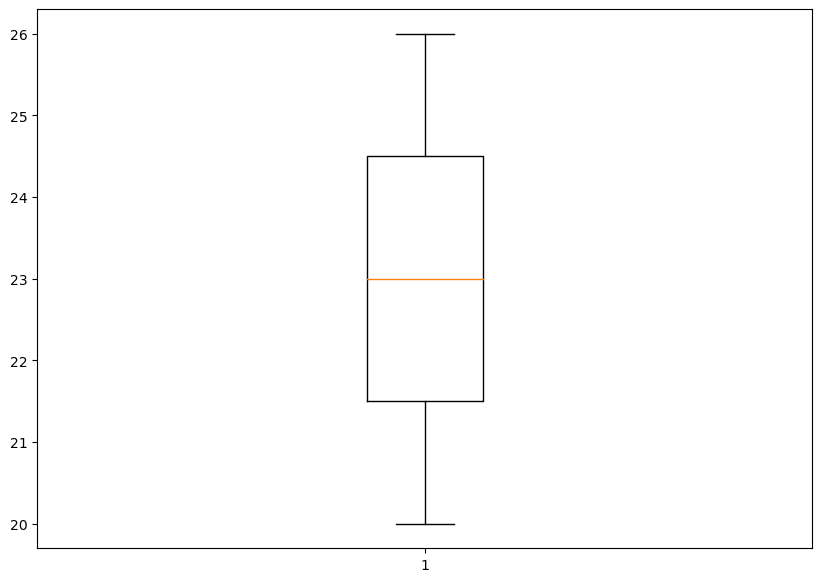

In [19]:
import matplotlib.pyplot as plt
import numpy as np

data = np.array([20,21,22,23,24,25,26])

fig = plt.figure(figsize = (10,7))
plt.boxplot(data)
plt.show

